In [17]:
##Basado en 
#Admin. (2019, September 22). Reconocimiento de matrículas con Raspberry Pi y OpenCV - José Marin de la Fuente. José Marin de la Fuente. https://www.marindelafuente.com.ar/reconocimiento-de-matriculas-con-raspberry-pi-y-opencv/
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
import easyocr

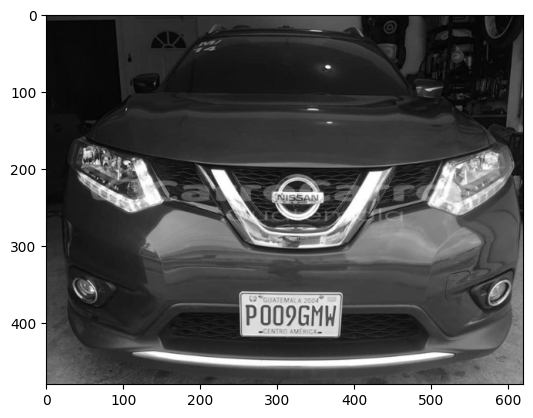

In [2]:
image = cv2.imread(r"C:\Users\david\Documents\Estudios\ProyectoFinal\imagenes\placas\placa3.jpg")
img_small = cv2.resize(image, (620,480) )
image_grey = cv2.cvtColor(img_small, cv2.COLOR_RGB2GRAY)
plt.imshow(image_grey,cmap='gray')
plt.show()

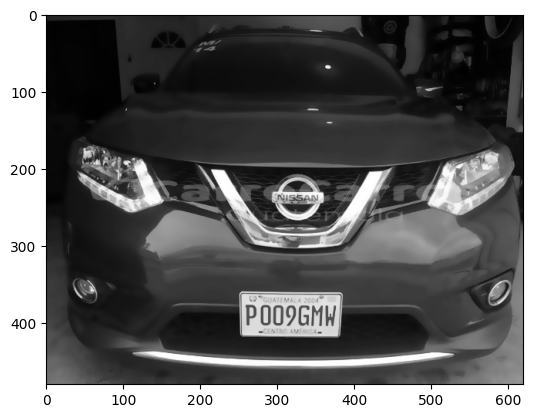

In [3]:
imagen_clear = cv2.bilateralFilter(image_grey, 11, 17, 17)
plt.imshow(imagen_clear,cmap='gray')
plt.show()

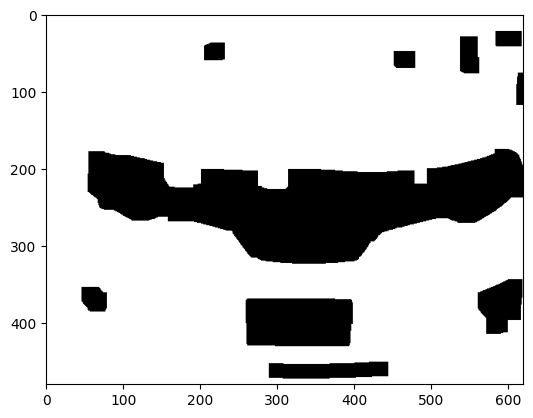

In [4]:
edged = cv2.Canny(imagen_clear, 30, 200)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
img_dilation = cv2.dilate(edged,kernel,iterations = 5)
img_erode = cv2.erode(img_dilation,kernel,iterations = 10)
img_dilation_2 = cv2.dilate(img_erode,kernel,iterations =6)
plt.imshow(img_dilation_2,cmap = 'binary')
plt.show()

In [13]:
cnts = cv2.findContours(img_dilation_2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:100]
screenCnt = None

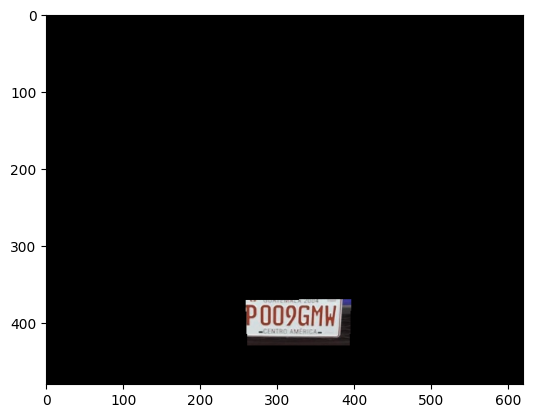

In [14]:
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * peri, True)
    if len(approx) == 4:
        screenCnt = approx
        mask = np.zeros(imagen_clear.shape,np.uint8)
        new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
        new_image = cv2.bitwise_and(img_small,img_small,mask=mask)
        plt.imshow(new_image)
        plt.show()
        break

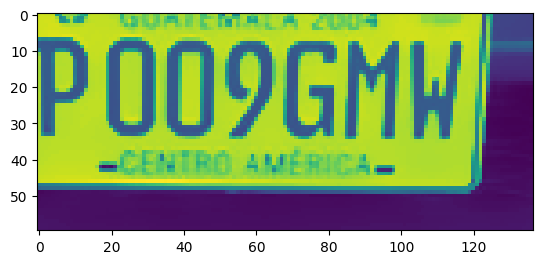

In [15]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
new_imagen = cv2.threshold(imagen_clear, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
Cropped = imagen_clear[topx:bottomx+1, topy:bottomy+1]
plt.imshow(Cropped)
plt.show()

In [16]:
reader = easyocr.Reader(['es'])
result = reader.readtext(Cropped, detail = 0)
print(result)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


['POO9GMH|']
